# A robust-contrast trainable ConvNet layer for image classification using  quaternion monogenic function
## Boxplots

*Contrast Haze*

---
## Import libraries

In [40]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Open Data

In [41]:
dataset_names = [
        'cad_haze_results.csv',
        'cifar_haze_results.csv']
paths = ['contrast_haze/', 'q9_haze/']
con = '$C_{H}$'

In [42]:
b = []
for names in dataset_names:
    for pth in paths:
        df_ = pd.read_csv('{}/{}'.format(pth, names), usecols=['Model', 'Level', 'Test', 'Test_acc'])
        b.append(df_)
df = pd.concat(b)
print(df.shape)
df.Test.unique()

(288, 4)


array(['A1C', 'A1M6', 'A2C', 'A2M6', 'A3C', 'A3M6', 'A1Q9', 'A2Q9',
       'A3Q9'], dtype=object)

## Clean data

In [43]:
df[['dataset','train_level', 'Train1']] = df.Model.str.split("-",expand=True,)
df[['Train', 'temp']] = df.Train1.str.split(".",expand=True,)
df.drop('Model', axis='columns', inplace=True)
df.drop('temp', axis='columns', inplace=True)
df.drop('Train1', axis='columns', inplace=True)

df['train_level']  = df.train_level.replace('0', '$d_0$')
df['train_level']  = df.train_level.replace('3', '$d_3$')
df['train_level']  = df.train_level.replace('1', '$d_1$')
df['train_level']  = df.train_level.replace('2', '$d_2$')
df['dataset']  = df.dataset.replace('cad_haze', 'DvsC')
df['dataset']  = df.dataset.replace('cifar_haze', 'CIFAR-10')

df.head(70)

Level  Test  Test_acc dataset train_level Train
0       0   A1C  0.632500    DvsC       $d_0$   A1C
1       0   A1C  0.633333    DvsC       $d_1$   A1C
2       0   A1C  0.569167    DvsC       $d_2$   A1C
3       0   A1C  0.582500    DvsC       $d_3$   A1C
4       0  A1M6  0.666667    DvsC       $d_0$  A1M6
..    ...   ...       ...     ...         ...   ...
65      2   A3C  0.711667    DvsC       $d_1$   A3C
66      2   A3C  0.758333    DvsC       $d_2$   A3C
67      2   A3C  0.642500    DvsC       $d_3$   A3C
68      2  A3M6  0.770833    DvsC       $d_0$  A3M6
69      2  A3M6  0.779167    DvsC       $d_1$  A3M6

[70 rows x 6 columns]

In [44]:
df.Train.unique()

array(['A1C', 'A1M6', 'A2C', 'A2M6', 'A3C', 'A3M6', 'A1Q9', 'A2Q9',
       'A3Q9'], dtype=object)

## Maximum test accuracy values

In [45]:
models = ['A1', 'A2', 'A3']
dat = df.dataset.unique()
lev = df.train_level.unique()
out = []
r2 = []
header =df.columns
for m in models:
    #print(m)
    for d in dat:
        #get the test acc values by model and dataset
        tmp0 = df.loc[(df.Test.str.contains(m)) & (df['dataset'] == d) &  (df.train_level.str.contains('d'))]
        # get the maximum test acc from all models (C, Q9, and M6)
        tmp1 = tmp0[tmp0.Test_acc == tmp0.Test_acc.max()]
        #add dval colum  (square difference)
        tmp0['dval'] = (tmp0.Test_acc - tmp0.Test_acc.max())**2 
        header2 =tmp0.columns
        #Create new list with the most important information
        for index, rows in tmp0.iterrows():
            my_list0 =[rows.Level, rows.Test, rows.Test_acc, rows.dataset,rows.train_level, rows.Train, rows.dval]
            r2.append(my_list0)
        for index, rows in tmp1.iterrows():
            my_list =[rows.Level, rows.Test, rows.Test_acc, rows.dataset,rows.train_level, rows.Train]
            out.append(my_list)
         #   print(tmp1)
df_out = pd.DataFrame(out, columns=header) #Maximum values
df_r2 = pd.DataFrame(r2, columns=header2)  #r square difference

/home/umoya/anaconda3/envs/tf2/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


### Number of maximum values for each dataset and model

   Level  Test  Test_acc   dataset train_level Train
0      2  A1M6  0.706667      DvsC       $d_1$  A1M6
1      0   A1C  0.581889  CIFAR-10       $d_0$   A1C
2      0  A2M6  0.741667      DvsC       $d_3$  A2M6
3      1   A2C  0.583000  CIFAR-10       $d_1$   A2C
5      2  A3M6  0.785833      DvsC       $d_2$  A3M6
6      1  A3Q9  0.641556  CIFAR-10       $d_2$  A3Q9


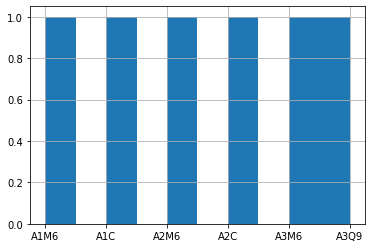

In [46]:
sds = df_out.drop_duplicates(subset='Test_acc', keep="last")
print(sds)
sds.Test.hist()
plt.show()

### Get the  values for each dash-line (maximum values)

In [47]:
#A1blue = df_out[(df_out.Test.str.contains('A1')) & (df_out['dataset'] == 'MNIST')].Test_acc.unique()
#A1orange = df_out[(df_out.Test.str.contains('A1')) & (df_out['dataset'] == 'fashion MNIST')].Test_acc.unique()
A1green = df_out[(df_out.Test.str.contains('A1')) & (df_out['dataset'] == 'CIFAR-10')].Test_acc.unique()
A1red = df_out[(df_out.Test.str.contains('A1')) & (df_out['dataset'] == 'DvsC')].Test_acc.unique()

#A2blue = df_out[(df_out.Test.str.contains('A2')) & (df_out['dataset'] == 'MNIST')].Test_acc.unique()
#A2orange = df_out[(df_out.Test.str.contains('A2')) & (df_out['dataset'] == 'fashion MNIST')].Test_acc.unique()
A2green = df_out[(df_out.Test.str.contains('A2')) & (df_out['dataset'] == 'CIFAR-10')].Test_acc.unique()
A2red = df_out[(df_out.Test.str.contains('A2')) & (df_out['dataset'] == 'DvsC')].Test_acc.unique()

A3green = df_out[(df_out.Test.str.contains('A3')) & (df_out['dataset'] == 'CIFAR-10')].Test_acc.unique()
A3red = df_out[(df_out.Test.str.contains('A3')) & (df_out['dataset'] == 'DvsC')].Test_acc.unique()


### Compute the sum of the square differences of the maximum

In [48]:

ac = df_r2.loc[(df_r2.Test.str.contains('C'))]['dval'].sum()
am6 = df_r2.loc[(df_r2.Test.str.contains('M6'))]['dval'].sum()
aq9 = df_r2.loc[(df_r2.Test.str.contains('Q9'))]['dval'].sum()
print(" Sum of squares differences C", ac,'\n Sum of squares differences M6',am6,' \n Sum of squares differences Q9', aq9)

 Sum of squares differences C 5.787284444354729 
 Sum of squares differences M6 0.3145625108519318  
 Sum of squares differences Q9 0.7301989408735124


---
## Display values in a Table

In [49]:
df =  df.rename(columns={'Train': 'Model', 'train_level': 'Degradation in trained model'})

In [50]:
df.groupby(['Model', 'dataset']).Test_acc.describe()

count      mean       std       min       25%       50%  \
Model dataset                                                             
A1C   CIFAR-10   16.0  0.358076  0.163674  0.113111  0.222472  0.380833   
      DvsC       16.0  0.569948  0.041256  0.500000  0.549583  0.575000   
A1M6  CIFAR-10   16.0  0.494694  0.014658  0.463556  0.487750  0.498333   
      DvsC       16.0  0.679063  0.019155  0.644167  0.666042  0.680417   
A1Q9  CIFAR-10   16.0  0.481910  0.016364  0.437444  0.475667  0.486389   
      DvsC       16.0  0.612344  0.025970  0.562500  0.594375  0.610417   
A2C   CIFAR-10   16.0  0.359396  0.165065  0.104778  0.218167  0.386333   
      DvsC       16.0  0.565417  0.072381  0.492500  0.492500  0.561667   
A2M6  CIFAR-10   16.0  0.513743  0.021046  0.471556  0.500278  0.510333   
      DvsC       16.0  0.702865  0.024625  0.663333  0.682500  0.700417   
A2Q9  CIFAR-10   16.0  0.493771  0.025506  0.446556  0.485222  0.489278   
      DvsC       16.0  0.628958  0.021164  0.596667  0.610208  0.627917   
A3C   CIFAR-10   16.0  0.352417  0.206463  0.095889  0.157222  0.333833   
      DvsC       16.0  0.638646  0.100475  0.489167  0.553958  0.634167   
A3M6  CIFAR-10   16.0  0.590868  0.024960  0.529556  0.577194  0.596500   
      DvsC       16.0  0.772969  0.012446  0.733333  0.769167  0.775833   
A3Q9  CIFAR-10   16.0  0.612986  0.017568  0.578889  0.606250  0.607778   
      DvsC       16.0  0.733281  0.017869  0.700833  0.718125  0.734167   

                     75%       max  
Model dataset                       
A1C   CIFAR-10  0.515000  0.581889  
      DvsC      0.582500  0.633333  
A1M6  CIFAR-10  0.504722  0.515222  
      DvsC      0.690000  0.706667  
A1Q9  CIFAR-10  0.491500  0.498556  
      DvsC      0.631458  0.650000  
A2C   CIFAR-10  0.507583  0.583000  
      DvsC      0.638542  0.659167  
A2M6  CIFAR-10  0.531222  0.546222  
      DvsC      0.723542  0.741667  
A2Q9  CIFAR-10  0.501417  0.535556  
      DvsC      0.638542  0.661667  
A3C   CIFAR-10  0.557722  0.618222  
      DvsC      0.715625  0.785000  
A3M6  CIFAR-10  0.604528  0.623000  
      DvsC      0.779167  0.785833  
A3Q9  CIFAR-10  0.623111  0.641556  
      DvsC      0.749375  0.759167

## Display the main grid of boxen plots

<Figure size 864x576 with 0 Axes>

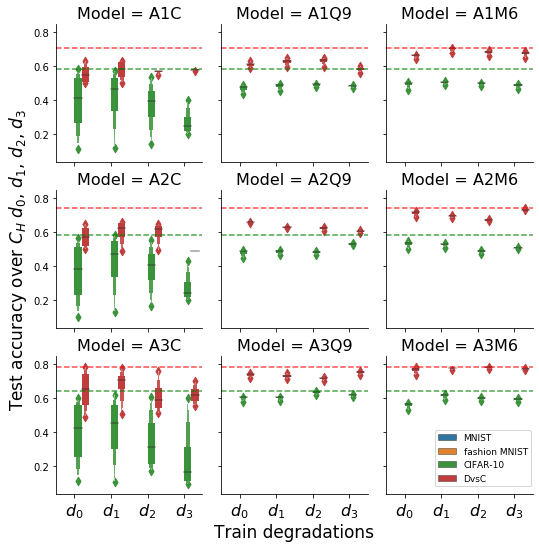

In [53]:
fig = plt.gcf()
fig.set_size_inches(12, 8)

grid = sns.catplot(x='Degradation in trained model', 
            y='Test_acc', hue='dataset', data=df, 
            col="Model", kind="boxen", 
            height=2.5, aspect=1, col_wrap=3,
            order=['$d_0$','$d_1$','$d_2$','$d_3$'], 
            hue_order=['MNIST', 'fashion MNIST','CIFAR-10','DvsC'], legend = False, 
            col_order =['A1C','A1Q9','A1M6', 'A2C', 'A2Q9','A2M6','A3C','A3Q9','A3M6'], linewidth=1   )

grid.set_xticklabels(fontsize = 16)
grid.set_titles(size=16)
grid.set_ylabels('',fontsize = 14)
grid.set_xlabels('',  fontsize = 14)


grid.axes[7].set_xlabel('Train degradations', fontsize = 17)
grid.axes[3].set_ylabel('Test accuracy over {} $d_0$, $d_1$, $d_2$, $d_3$'.format(con), fontsize = 17)

#Dash lines for the maximum
for i in range(0,3):
    grid.axes[i].axhline(A1red, ls='--', c='red', alpha=.7)
    grid.axes[i].axhline(A1green, ls='--', c='green', alpha=.7)

for i in range(3,6):
    grid.axes[i].axhline(A2red, ls='--', c='red', alpha=.7)
    grid.axes[i].axhline(A2green, ls='--', c='green', alpha=.7)


for i in range(6,9):
    grid.axes[i].axhline(A3red, ls='--', c='red', alpha=.7)
    grid.axes[i].axhline(A3green, ls='--', c='green', alpha=.7)
    
#fig.tight_layout() 
plt.legend(bbox_to_anchor=(0.3, 0.5, .72, 0), loc="upper left", mode="expand", ncol=1, fontsize=9)
#plt.savefig('c_h_3_3.eps', format='eps', dpi=300)
plt.show()